In [1]:
import numpy as np
from numpy import array 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pydotplus
import json

In [2]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from cassandracsv import CassandraCsv

file_path= os.path.join(os.getcwd(),'concrete_strength-token.json')
with open(file_path) as f:
    file= json.load(f)
    id= file["clientId"]
    secret= file["secret"]

cloud_config= {
        'secure_connect_bundle': os.path.join(os.getcwd(), 'secure-connect-concrete-strength.zip')
                    }
auth_provider = PlainTextAuthProvider(id, secret)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session= cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
  print(row[0])
else:
  print("An error occurred.")

4.0.0.6816


In [3]:
session= cluster.connect('concrete_strength')

In [4]:
df = session.execute("SELECT * FROM concrete_strength_csv;")
df = pd.DataFrame([d for d in df])
df= df.astype(float)
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,3.0,19.52
1,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,14.0,31.35
2,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,28.0,38.50
3,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,56.0,45.08
4,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,100.0,47.82


## FE

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,3.0
1,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,14.0
2,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,28.0
3,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,56.0
4,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,100.0
...,...,...,...,...,...,...,...,...
999,322.0,0.0,0.0,203.0,0.0,974.0,800.0,129.5
1000,322.0,0.0,116.0,196.0,10.0,818.0,813.0,28.0
1001,322.0,149.0,0.0,186.0,8.0,951.0,709.0,28.0
1002,355.0,19.0,97.0,145.0,12.3,967.0,871.0,28.0


KeyError: "['fine_aggregate '] not in index"

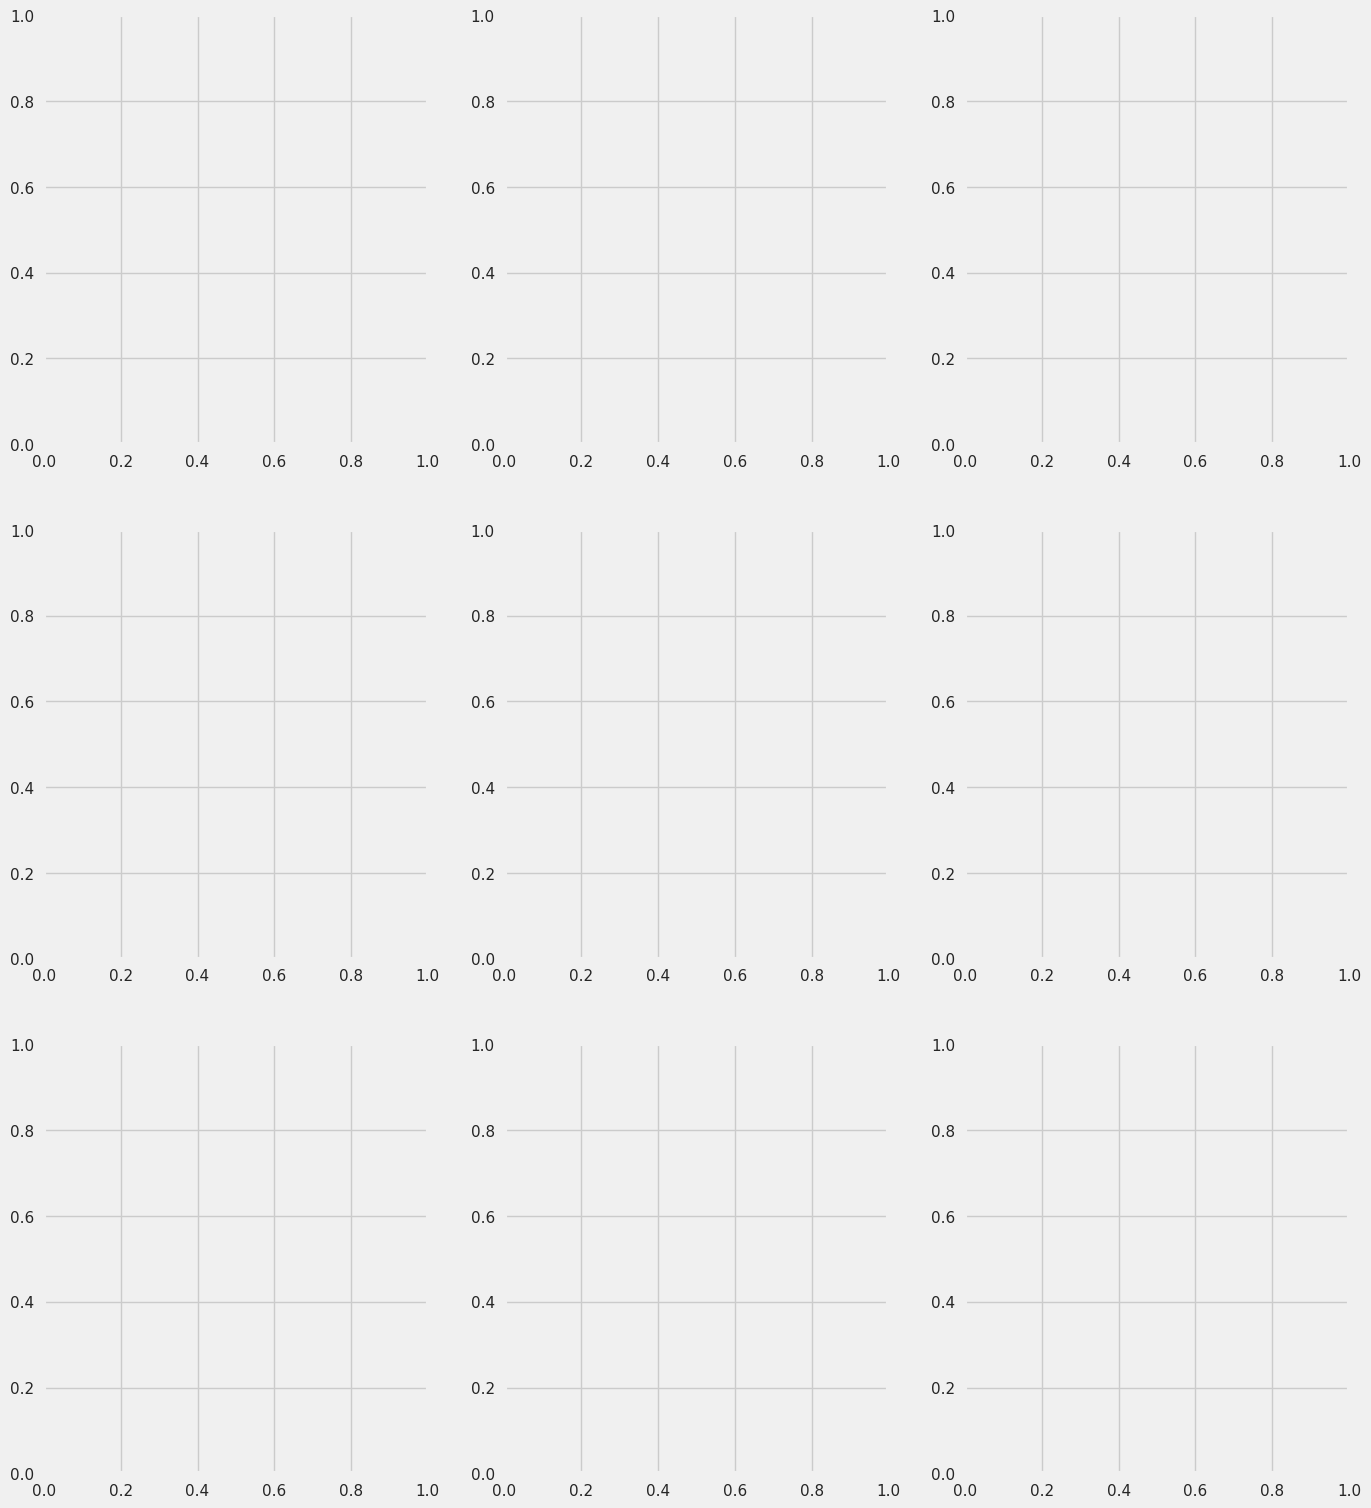

# train_test_split

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
## Independent and dependent features
X = data.drop(['class'], axis=1)  
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Selecting the best features for our model:
##### using SelectKBest method with score_func as chi2

In [37]:
from sklearn.feature_selection import SelectKBest, chi2

In [40]:
select = SelectKBest(score_func=chi2, k=12)
fs= select.fit_transform(X_train, y_train) # fitting & transorming train data
print("After selecting best 12 features:", fs.shape)

ValueError: could not convert string to float: 'k'

We've selected 12 best features in x data. To identify the selected features we use get_support() function and filter out them from the features name list.  The fs object contains selected x data. 

In [34]:
filter = select.get_support()
filter

AttributeError: 'SelectKBest' object has no attribute 'scores_'

In [ ]:
filter = select.get_support()
features = array(X_train.columns)
 
print("All features:")
print(features)
print("                               ") 
print("Selected best 12:")
print(features[filter])

All features:
['cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor' 'gill-attachment'
 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape' 'stalk-root'
 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-color'
 'ring-number' 'ring-type' 'spore-print-color' 'population' 'habitat']
                               
Selected best 12:
['cap-surface' 'bruises' 'gill-spacing' 'gill-size' 'gill-color'
 'stalk-root' 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'ring-type' 'spore-print-color' 'population' 'habitat']


In [ ]:
X_train_new= X_train[features[filter]] # creating new X_train with selected features

In [ ]:
X_train_new.columns

Index(['cap-surface', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
X_test_new= X_test[features[filter]] # creating new X_test with selected features

In [ ]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns
# select numerical and catagorical datas

In [ ]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
# if no outlyers use mean, if outlyers are there use median or mode
# for catagorical features use most frequent value
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import LabelEncoder # Label Encoding i.e., converting nominal catagorical features to numerical features(Feature Engineering)
# handling missing values-->feature scaling-->ordinal encoding....data should be handled in this order. This is what pipelining is all about
## pipelines: pipeline is combining multiple steps one after the other
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # to group the pipelines together

In [ ]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='categorical')),
    ('get_dummies',LabelEncoder()),
    ('scaler',StandardScaler())
    ]

)
# combine numerical and catagorical pipeline
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [ ]:
## Train test split

#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [ ]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
# fit_transform training data, only transform for test data & convert to dataframe

In [ ]:
filter = select.get_support()
features = array(X_train.columns)
X_train= X_train[features[filter]] # creating new X_train with selected features
X_test= X_test[features[filter]] # creating new X_test with selected features

In [ ]:
X_train.head()

,num_pipeline__cap-surface,num_pipeline__bruises,num_pipeline__gill-spacing,num_pipeline__gill-size,num_pipeline__gill-color,num_pipeline__stalk-root,num_pipeline__stalk-surface-above-ring,num_pipeline__stalk-surface-below-ring,num_pipeline__ring-type,num_pipeline__spore-print-color,num_pipeline__population,num_pipeline__habitat
0,0.136921,-0.842237,-0.438473,1.498210,-1.354131,1.525962,0.688059,-0.887615,-1.261850,1.419717,0.287342,-0.877177
1,0.136921,-0.842237,-0.438473,1.498210,-1.354131,-0.653170,-0.918730,0.593034,-1.261850,1.419717,0.287342,1.443749
2,0.951054,-0.842237,-0.438473,1.498210,-1.354131,-0.653170,0.688059,0.593034,-1.261850,1.419717,0.287342,0.283286
3,-1.491346,1.187314,-0.438473,-0.667463,1.177739,-0.653170,0.688059,0.593034,0.954123,-0.255816,0.287342,-0.877177
4,0.951054,1.187314,-0.438473,-0.667463,-0.228856,0.436396,0.688059,0.593034,0.954123,-0.255816,-1.301290,0.863517


In [ ]:
## Model Training
from sklearn.svm import SVC        # models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score     # parameters

In [ ]:
XGBoost=XGBClassifier()       # create object of the model
XGBoost.fit(X_train,y_train)     # apply object to train data

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
from sklearn import metrics


In [ ]:
import numpy as np
def evaluate_model(true, predicted):
    report= classification_report(true, predicted)
    cm = confusion_matrix(true, predicted)
    accuracy = metrics.accuracy_score(true, predicted)
    return report, cm, accuracy

In [ ]:
## Train multiple models

models={
    'XGBoost':XGBClassifier(),          # keys for different models: values for models; so this is key-value pair
    'Random_forest':RandomForestClassifier(),
    'SVC':SVC()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    #mae, rmse, r2_square=evaluate_model(y_test,y_pred)
    accuracy, report, cm= model_report(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    
    print("accuracy",accuracy*100)
    print("report", report)
    print("confusion matrix", cm)

    r2_list.append(accuracy)
    
    print('='*35)
    print('\n')


NameError: name 'X_train' is not defined

In [ ]:
model_list

['XGBoost', 'Random_forest', 'SVC']